In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
from copy import deepcopy

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold 
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV # решетчатый поиск


from sklearn import set_config
set_config(display = "diagram")

In [6]:
train = pd.read_csv("income_train.csv")
test = pd.read_csv("income_test.csv")

In [7]:
X = train.drop(columns=['income'])
y = 1*(train['income'] == '>50K')

## Проведем EDA

Модели, основанные на деревьях решений работают хуже, если в данных очень много признаков, поэтому аналогично KNN урежем некотооые категории. Для таких моделей, как известно, не нужно скалировать данные, поэтому в кросс-валидации будем перебирать параметры только алгооритма

<AxesSubplot:>

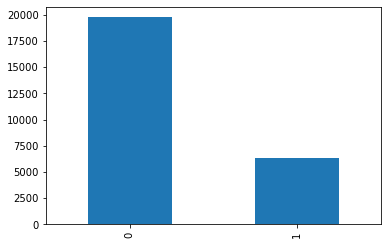

In [11]:
y.value_counts().plot(kind='bar')

Видим неравномерное распределение y (дисбаланс классов), поэтому используем мтерику auc_roc

In [42]:
def prep_cat(df):
    
    df.loc[~ (df['native-country'] == 'United-States'), 'native-country'] = 0
    df.loc[ ~(df['education'].isin(['HS-grad', 'Some-college', 'Bachelors']) ), 'education'] = 0
    df.loc[ ~(df['occupation'].isin( X['occupation'].value_counts().index[:5]) ), 'occupation'] = 0
    
    return df

def prepare_end_to_end(X, needed_cols=None):
    lst_int = []
    lst_str = []
    for col in X:
        if (X[col]).dtype == 'int':
            lst_int.append(col)
        else:
            lst_str.append(col)
    X1 = deepcopy(X)
    X1 = prep_cat(X1) 
    #если функция применяется на этапе теста, то после dummy кодирования какие-то колонки могли исчезнуть
    X1 = pd.concat([pd.get_dummies(X1[lst_str]), X1[lst_int]], axis=1)
    if needed_cols is None:
        return X1
    
    to_add = set(needed_cols).difference(X1.columns)
    for col in to_add:
        X1[col] = 0
    return X1[needed_cols]
    
    

X_tr, X_val, y_train, y_test = train_test_split(X, y, random_state = 56, test_size = 0.25, stratify = y)
X_train = prepare_end_to_end(X_tr)

In [19]:
kfold = KFold(n_splits = 3, shuffle = True)

loss = ['deviance', 'exponential'] 
subsample = [0.5, 0.8, 1.]
n_estimators = [25, 50, 100, 150, 200, 300, 400, 500, 600, 750, 1000]
max_depth = [3, 4, 5]
max_features = ['log2', 'sqrt']
# делаем решетку ParamGrid
pipe = Pipeline([
                 ('classifier', GradientBoostingClassifier(learning_rate=0.05))
])
param_grid = [
    {
    'classifier': [GradientBoostingClassifier(learning_rate=0.05)],
    'classifier__loss': loss,  
    'classifier__n_estimators': n_estimators,
    'classifier__max_depth' : max_depth,
    'classifier__subsample' : subsample,
    'classifier__max_features' : max_features
    }
]

grid = GridSearchCV(pipe, param_grid , 
                    cv=kfold, 
                    return_train_score=True, verbose=2, scoring='roc_auc')
grid.fit(X_train, y_train)



Fitting 3 folds for each of 396 candidates, totalling 1188 fits
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=25, classifier__subsample=0.5; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=25, classifier__subsample=0.5; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=25, classifier__subsample=0.5; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=25, classifier__subsample=0.8; total time=   0.1s
[CV] END classifier=GradientBoos

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=200, classifier__subsample=0.5; total time=   0.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=200, classifier__subsample=0.5; total time=   0.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=200, classifier__subsample=0.5; total time=   0.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=200, classifier__subsample=0.8; total time=   0.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=600, classifier__subsample=0.5; total time=   2.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=600, classifier__subsample=0.5; total time=   2.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=600, classifier__subsample=0.8; total time=   2.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=600, classifier__subsample=0.8; total time=   2.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=50, classifier__subsample=0.5; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, c

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=300, classifier__subsample=1.0; total time=   1.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=750, classifier__subsample=0.8; total time=   3.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=750, classifier__subsample=0.8; total time=   2.9s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=750, classifier__subsample=1.0; total time=   2.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=750, classifier__subsample=1.0; total time=   2.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=400, classifier__subsample=1.0; total time=   1.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=400, classifier__subsample=1.0; total time=   1.8s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=400, classifier__subsample=1.0; total time=   1.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=500, classifier__subsample=0.5; total time=   2.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=1000, classifier__subsample=1.0; total time=   4.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=1000, classifier__subsample=1.0; total time=   4.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=25, classifier__subsample=0.5; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=25, classifier__subsample=0.5; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=150, classifier__subsample=1.0; total time=   0.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=200, classifier__subsample=0.5; total time=   0.9s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=200, classifier__subsample=0.5; total time=   0.9s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=200, classifier__subsample=0.5; total time=   0.9s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=600, classifier__subsample=0.5; total time=   2.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=600, classifier__subsample=0.5; total time=   2.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=600, classifier__subsample=0.5; total time=   2.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=600, classifier__subsample=0.8; total time=   3.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=50, classifier__subsample=0.5; total time=   0.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=50, classifier__subsample=0.5; total time=   0.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=50, classifier__subsample=0.8; total time=   0.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, c

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=300, classifier__subsample=0.5; total time=   1.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=300, classifier__subsample=0.8; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=750, classifier__subsample=0.8; total time=   4.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=750, classifier__subsample=0.8; total time=   4.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=750, classifier__subsample=0.8; total time=   4.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=750, classifier__subsample=1.0; total time=   3.8s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100, classifier__subsample=0.8; total time=   0.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__subsample=0.8; total time=   2.4s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__subsample=1.0; total time=   2.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__subsample=1.0; total time=   2.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__subsample=1.0; total time=   2.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=devianc

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=1000, classifier__subsample=1.0; total time=   5.4s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=1000, classifier__subsample=1.0; total time=   5.8s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=deviance, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=1000, classifier__subsample=1.0; total time=   5.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=25, classifier__subsample=0.5; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=ex

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=150, classifier__subsample=1.0; total time=   0.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=150, classifier__subsample=1.0; total time=   0.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=150, classifier__subsample=1.0; total time=   0.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=200, classifier__subsample=0.5; total time=   0.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=500, classifier__subsample=1.0; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=500, classifier__subsample=1.0; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=500, classifier__subsample=1.0; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=log2, classifier__n_estimators=600, classifier__subsample=0.5; total time=   1.9s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=25, classifier__subsample=1.0; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=25, classifier__subsample=1.0; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=50, classifier__subsample=0.5; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=50, classifier__subsample=0.5; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=200, classifier__subsample=1.0; total time=   0.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=300, classifier__subsample=0.5; total time=   1.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=300, classifier__subsample=0.5; total time=   1.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=600, classifier__subsample=1.0; total time=   2.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=600, classifier__subsample=1.0; total time=   2.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=750, classifier__subsample=0.5; total time=   2.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=3, classifier__max_features=sqrt, classifier__n_estimators=750, classifier__subsample=0.5; total time=   2.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=50, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=100, classifier__subsample=0.5; total time=   0.4s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=100, classifier__subsample=0.5; total time=   0.4s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__lo

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=300, classifier__subsample=1.0; total time=   1.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=300, classifier__subsample=1.0; total time=   1.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=400, classifier__subsample=0.5; total time=   1.5s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=400, classifier__subsample=0.5; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=750, classifier__subsample=1.0; total time=   3.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=750, classifier__subsample=1.0; total time=   3.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=1000, classifier__subsample=0.5; total time=   4.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=log2, classifier__n_estimators=1000, classifier__subsample=0.5; total time=   3.9s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=100, classifier__subsample=1.0; total time=   0.4s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=150, classifier__subsample=0.5; total time=   0.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=150, classifier__subsample=0.5; total time=   0.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__subsample=1.0; total time=   1.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=400, classifier__subsample=1.0; total time=   1.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=500, classifier__subsample=0.5; total time=   2.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=500, classifier__subsample=0.5; total time=   1.9s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=1000, classifier__subsample=1.0; total time=   4.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=4, classifier__max_features=sqrt, classifier__n_estimators=1000, classifier__subsample=1.0; total time=   4.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=25, classifier__subsample=0.5; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=25, classifier__subsample=0.5; total time=   0.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=150, classifier__subsample=1.0; total time=   0.8s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=150, classifier__subsample=1.0; total time=   0.8s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=200, classifier__subsample=0.5; total time=   0.9s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=200, classifier__subsample=0.5; total time=   1.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=500, classifier__subsample=1.0; total time=   2.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=500, classifier__subsample=1.0; total time=   2.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=600, classifier__subsample=0.5; total time=   3.0s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=log2, classifier__n_estimators=600, classifier__subsample=0.5; total time=   2.9s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=25, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=25, classifier__subsample=1.0; total time=   0.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=50, classifier__subsample=0.5; total time=   0.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=50, classifier__subsample=0.5; total time=   0.3s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, classifier__subsample=1.0; total time=   1.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=200, classifier__subsample=1.0; total time=   1.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=300, classifier__subsample=0.5; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=300, classifier__subsample=0.5; total time=   1.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=600, classifier__subsample=1.0; total time=   3.2s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=600, classifier__subsample=1.0; total time=   3.1s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=750, classifier__subsample=0.5; total time=   3.6s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__loss=exponential, classifier__max_depth=5, classifier__max_features=sqrt, classifier__n_estimators=750, classifier__subsample=0.5; total time=   3.7s
[CV] END classifier=GradientBoostingClassifier(learning_rate=0.05), classifier__

GridSearchCV(cv=KFold(n_splits=3, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('classifier',
                                        GradientBoostingClassifier(learning_rate=0.05))]),
             param_grid=[{'classifier': [GradientBoostingClassifier(learning_rate=0.05,
                                                                    max_depth=4,
                                                                    max_features='sqrt',
                                                                    n_estimators=750)],
                          'classifier__loss': ['deviance', 'exponential'],
                          'classifier__max_depth': [3, 4, 5],
                          'classifier__max_features': ['log2', 'sqrt'],
                          'classifier__n_estimators': [25, 50, 100, 150, 200,
                                                       300, 400, 500, 600, 750,
                                                       1000],
                          'classifier__subsample': [0.5, 0.8, 1.0]}],
             return_train_score=True, scoring='roc_auc', verbose=2)

In [20]:
grid.best_score_

0.9206755772981837

In [21]:

print("------------------ Обучили и тестировали ------------------")
print("Лучшие параметры по кросс-валидации: \n{}\n ".format(grid.best_params_))
print("--------------------------------------------------------")
print("Средняя правильность наилучшей модели по кросс-валидации : {:.6f}\n".format(grid.best_score_))
print("--------------------------------------------------------")


------------------ Обучили и тестировали ------------------
Лучшие параметры по кросс-валидации: 
{'classifier': GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           n_estimators=750), 'classifier__loss': 'deviance', 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 750, 'classifier__subsample': 1.0}
 
--------------------------------------------------------
Средняя правильность наилучшей модели по кросс-валидации : 0.920676

--------------------------------------------------------


In [66]:
gridresults = pd.DataFrame(grid.cv_results_)
gridresults.to_csv('res_boost.csv')
best_model = grid.best_estimator_
grid.best_estimator_

Pipeline(steps=[('classifier',
                 GradientBoostingClassifier(learning_rate=0.05, max_depth=4,
                                            max_features='sqrt',
                                            n_estimators=750))])

In [70]:
X_val = prepare_end_to_end(X_val, X_train.columns)
grid.best_estimator_.score(X_val, y_test)

0.8708538083538083

Бонус: feature importnace

In [79]:
sort_inds = np.argsort(grid.best_estimator_[0].feature_importances_)

In [80]:
sort_inds

array([ 3,  8, 16, 34, 19, 27, 33, 14,  7, 32, 18,  0, 31, 22, 12, 35,  4,
       39, 38,  2, 13,  1,  9, 21,  6,  5, 11, 37, 29, 26, 10, 24, 20, 30,
       41, 28, 36, 23, 17, 45, 44, 40, 25, 15, 42, 43])

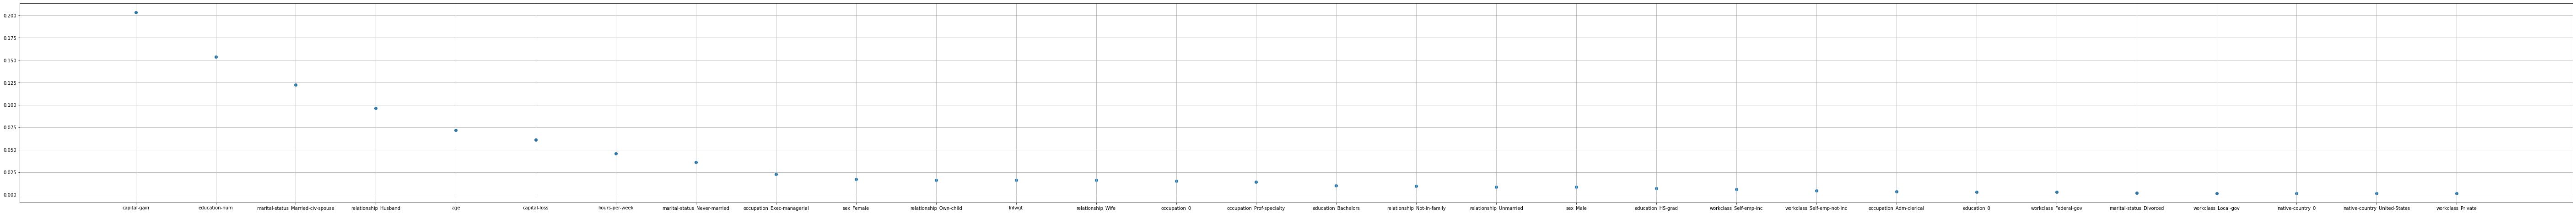

In [91]:
plt.figure(figsize=(100, 8))
plt.scatter(np.arange(X_val.shape[1])[:30], grid.best_estimator_[0].feature_importances_[sort_inds[::-1]][:30])
plt.xticks(np.arange(X_val.shape[1])[:30], X_val.columns[sort_inds[::-1]][:30])
plt.grid()
plt.show()

In [71]:
X_test = prepare_end_to_end(test, X_train.columns)
preds = grid.best_estimator_.predict(X_test)